In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# loading the cleaned dataset
df = pd.read_csv('C:/Users/HomePC/Documents/DA Projects/Med NLP classification Proj/data/processed/cleaned_mtsamples.csv')

# drop nulls if any
df.dropna(subset=['cleaned_text', 'medical_specialty'])

df.head()

,medical_specialty,transcription,cleaned_text
0,Allergy / Immunology,"SUBJECTIVE:, This 23-year-old white female pr...",subjective year old white female present compl...
1,Bariatrics,"PAST MEDICAL HISTORY:, He has difficulty climb...",past medical history difficulty climbing stair...
2,Bariatrics,"HISTORY OF PRESENT ILLNESS: , I have seen ABC ...",history present illness seen abc today pleasan...
3,Cardiovascular / Pulmonary,"2-D M-MODE: , ,1. Left atrial enlargement wit...",mode left atrial enlargement left atrial diame...
4,Cardiovascular / Pulmonary,1. The left ventricular cavity size and wall ...,left ventricular cavity size wall thickness ap...


In [3]:
# Preparing Inputs and Labels

from sklearn.calibration import LabelEncoder


x = df['cleaned_text']
y = df['medical_specialty']

le = LabelEncoder()
y_encoded = le.fit_transform(y)

#check encoding
dict(list(zip(le.classes_, range(len(le.classes_)))))

{' Allergy / Immunology': 0,
 ' Autopsy': 1,
 ' Bariatrics': 2,
 ' Cardiovascular / Pulmonary': 3,
 ' Chiropractic': 4,
 ' Consult - History and Phy.': 5,
 ' Cosmetic / Plastic Surgery': 6,
 ' Dentistry': 7,
 ' Dermatology': 8,
 ' Diets and Nutritions': 9,
 ' Discharge Summary': 10,
 ' ENT - Otolaryngology': 11,
 ' Emergency Room Reports': 12,
 ' Endocrinology': 13,
 ' Gastroenterology': 14,
 ' General Medicine': 15,
 ' Hematology - Oncology': 16,
 ' Hospice - Palliative Care': 17,
 ' IME-QME-Work Comp etc.': 18,
 ' Lab Medicine - Pathology': 19,
 ' Letters': 20,
 ' Nephrology': 21,
 ' Neurology': 22,
 ' Neurosurgery': 23,
 ' Obstetrics / Gynecology': 24,
 ' Office Notes': 25,
 ' Ophthalmology': 26,
 ' Orthopedic': 27,
 ' Pain Management': 28,
 ' Pediatrics - Neonatal': 29,
 ' Physical Medicine - Rehab': 30,
 ' Podiatry': 31,
 ' Psychiatry / Psychology': 32,
 ' Radiology': 33,
 ' Rheumatology': 34,
 ' SOAP / Chart / Progress Notes': 35,
 ' Sleep Medicine': 36,
 ' Speech - Language': 37

In [11]:
# Split Train and Test sets

x_train, x_test, y_train, y_test = train_test_split(x, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

In [5]:
#TF-IDF Vectorization

tfidf = TfidfVectorizer(
    max_features=10000,   # limit vocab size
    ngram_range=(1, 2),   # include unigrams and bigrams
    min_df=2,             # ignore very rare words
    max_df=0.9            # ignore very common words
)

X_train_tfidf = tfidf.fit_transform(x_train)
X_test_tfidf = tfidf.transform(x_test)

print('Train shape:', X_train_tfidf.shape)
print('Test shape:', X_test_tfidf.shape)

Train shape: (3972, 10000)
Test shape: (994, 10000)


In [6]:
# Sanity check

feature_names = tfidf.get_feature_names_out()
print('Sample feature names:', feature_names[:20])

Sample feature names: ['abc' 'abc year' 'abcd' 'abcd general' 'abcd hospital' 'abd' 'abdomen'
 'abdomen abdomen' 'abdomen benign' 'abdomen insufflated'
 'abdomen nontender' 'abdomen obese' 'abdomen pelvis' 'abdomen positive'
 'abdomen prepped' 'abdomen soft' 'abdomen without' 'abdominal'
 'abdominal aorta' 'abdominal aortic']


In [12]:
# Save Processed Objects

import joblib

joblib.dump(tfidf, 'C:/Users/HomePC/Documents/DA Projects/Med NLP classification Proj/models/tfidf_vectorizer.pkl')
joblib.dump(le, 'C:/Users/HomePC/Documents/DA Projects/Med NLP classification Proj/models/label_encoder.pkl')
joblib.dump((X_train_tfidf, y_train), 'C:/Users/HomePC/Documents/DA Projects/Med NLP classification Proj/models/vectorized_data.pkl')


['C:/Users/HomePC/Documents/DA Projects/Med NLP classification Proj/models/vectorized_data.pkl']

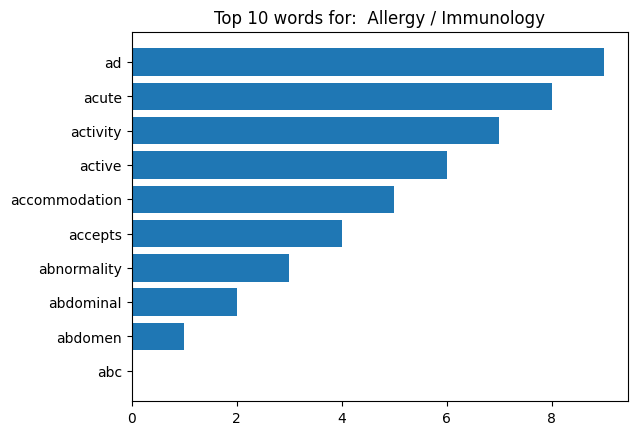

In [13]:
# Viz top words per specialty

import numpy as np
import matplotlib.pyplot as plt

def show_top_words_for_label(label_id, n=10):
    label_name = le.inverse_transform([label_id])[0]
    subset =df[df['medical_specialty'] == label_name]['cleaned_text']
    tfidf_local = TfidfVectorizer(max_features=1000, stop_words='english').fit(subset)
    freqs = tfidf_local.get_feature_names_out()
    plt.title(f'Top {n} words for: {label_name}')
    plt.barh(freqs[:n], range(n))
    plt.show()

show_top_words_for_label(0)  

In [ ]:
# Save vectorized data as a 4-tuple (X_train, X_test, y_train, y_test)
# This cell attempts to find the vectorized X and target y in the current notebook and will create a train/test split if needed, then write models/vectorized_data.pkl

import joblib
from pathlib import Path
from sklearn.model_selection import train_test_split

p = Path(r'C:/Users/HomePC/Documents/DA Projects/Med NLP classification Proj/models/vectorized_data.pkl')
ns = globals()

# Candidate variable names to look for in the notebook namespace
candidate_X = ['X_train_tfidf','X_tfidf','X_vectors','X_vectorized','X','X_all']
candidate_y = ['y_train','y','y_all','labels','y_vector']

found_X = None
found_y = None
found_X_name = None
found_y_name = None

for name in candidate_X:
    if name in ns:
        found_X = ns[name]
        found_X_name = name
        break

for name in candidate_y:
    if name in ns:
        found_y = ns[name]
        found_y_name = name
        break

if found_X is None or found_y is None:
    available = sorted([k for k in ns.keys() if isinstance(k, str) and (k.lower().startswith('x') or k.lower().startswith('y') or 'label' in k.lower())])
    print('Could not automatically find both X and y variables.')
    print('Found X:', found_X_name)
    print('Found y:', found_y_name)
    print('Available likely names in the notebook namespace:', available)
    raise RuntimeError('Please run previous cells that create the vectorized features (X) and target (y), or rename them to a recognized name.')

X = found_X
y = found_y
print(f'Using X variable "{found_X_name}" and y variable "{found_y_name}"')

# If X is already a 4-tuple saved in a variable, handle that
if isinstance(X, (list, tuple)) and len(X) == 4 and (found_X_name.lower().startswith('vector') or found_X_name.lower().startswith('x_')):
    # unlikely, but if X itself is the 4-tuple
    X_train_tfidf, X_test_tfidf, y_train, y_test = X
    print('Detected X variable already contains 4-tuple; unpacked it.')
else:
    # If X is a tuple/list of length 2 and y is also tuple/list length 2, assume already split
    if isinstance(X, (list, tuple)) and len(X) == 2 and isinstance(y, (list, tuple)) and len(y) == 2:
        X_train_tfidf, X_test_tfidf = X
        y_train, y_test = y
        print('Detected (X_train, X_test) and (y_train, y_test) structures; using them directly.')
    else:
        # Otherwise create a train/test split from X and y
        print('Creating train/test split from X and y (80/20).')
        X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Save the 4-tuple
p.parent.mkdir(parents=True, exist_ok=True)
joblib.dump((X_train_tfidf, X_test_tfidf, y_train, y_test), p)
print('Saved vectorized_data.pkl ->', p)

# Print shapes / lengths for verification
def _shape(x):
    try:
        return getattr(x, 'shape', len(x))
    except Exception:
        return 'unknown'

print('X_train:', type(X_train_tfidf), _shape(X_train_tfidf))
print('X_test:', type(X_test_tfidf), _shape(X_test_tfidf))
print('y_train len:', len(y_train))
print('y_test len:', len(y_test))


Using X variable "X_train_tfidf" and y variable "y_train"
Creating train/test split from X and y (80/20).
Saved vectorized_data.pkl -> C:\Users\HomePC\Documents\DA Projects\Med NLP classification Proj\models\vectorized_data.pkl
X_train: <class 'scipy.sparse._csr.csr_matrix'> unknown
X_test: <class 'scipy.sparse._csr.csr_matrix'> unknown
y_train len: 3177
y_test len: 795
